# Notes on Air Density and Humidity taken from

https://en.wikipedia.org/wiki/Density_of_air

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : April 28th 2017
- update :

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import re
import pandas as pd

In [2]:
from astropy.constants import N_A,R,g0
from astropy import units as u

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
M_air= 28.965338*u.g/u.mol
M_air_dry=28.964*u.g/u.mol
M_h2o=18.016*u.g/u.mol

In [5]:
# redefinition of variables
M_d=M_air_dry
M_v=M_h2o

## Density of air variables

### Temperature and pressure

The density of dry air can be calculated using the ideal gas law, expressed as a function of temperature and pressure:

$$
\rho  = \frac {p}{R_{specific} T} 
$$

where:

- $\rho = $  air density (kg/m3)
- $p = $  absolute pressure (Pa)
- $T = $  absolute temperature (K)
- $R_{\rm specific} = \frac{R}{M} $ specific gas constant for dry air (J/(kg·K))

The specific gas constant for dry air is 287.058 J/(kg·K) in SI units, 

In [6]:
R_specific=R/M_air_dry

In [7]:
print R_specific

0.287061863002 J / (g K)


In [8]:
# redefinition of R specific for dry air
R_d= R_specific

In [9]:
# R specific for water vapor
R_v = 0.461495 *u.J/u.K/u.g

In [10]:
print R_v

0.461495 J / (g K)


### Definition of humid air density
$$
\rho_{\,\mathrm{humid~air}} = \frac{p_{d}}{R_{d} T} + \frac{p_{v}}{R_{v} T} = \frac{p_{d}M_{d}+p_{v}M_{v}}{R T} 
$$

-  $ p_{d} = $ Partial pressure of dry air (Pa)
-  $ p_{v} = $ Pressure of water vapor (Pa)

where

$$
p_v = \phi p_{sat}
$$

- $\phi$ : relative humidity
- $p_{sat}$ : Saturation vapor pressure

### Saturation vapor pressure

$$
p_{sat} = 6.1078 \times 10^{\frac{7.5\cdot T}{T+237.3}}
$$

- where T is in $^o C$

### Partial pressure

$$
p = p_d + p_v
$$

## Pressure versus altitude

- $p_0 = $ sea level standard atmospheric pressure, 101.325 kPa
- $T_0 = $ sea level standard temperature, 288.15 K
- $g = $  earth-surface gravitational acceleration, 9.80665 m/s2
- $ L = $ temperature lapse rate, 0.0065 K/m (troposphere)
- $ R = $  ideal (universal) gas constant, 8.31447 J/(mol·K)
- $ M = $ molar mass of dry air, 0.0289644 kg/mol

Temperature at altitude $h$ meters above sea level is approximated by the following formula (only valid inside the troposphere):

$$
T = T_0 - L h 
$$

The pressure at altitude  $h$ is given by:
$$
   p = p_0 \left(1 - \frac{L h}{T_0} \right)^\frac{g M}{R L}
$$

Density can then be calculated according to a molar form of the ideal gas law:
$$
    \rho = \frac{p M}{R T}  
$$

where:

- $ M  = $ molar mass
- $ R  = $ ideal gas constant
- $ T  = $ absolute temperature
- $ p  = $ absolute pressure 

In [11]:
T0=288.15*u.K
p0=101325*u.Pa
L=0.0065*u.K/u.m

In [12]:
def pressure(h):
    p=p0*np.exp(g0*M_d/R/L*np.log(1-L*h/T0))
    return p

In [13]:
alt=np.linspace(0,20,100)*u.km

In [14]:
pres=pressure(alt)

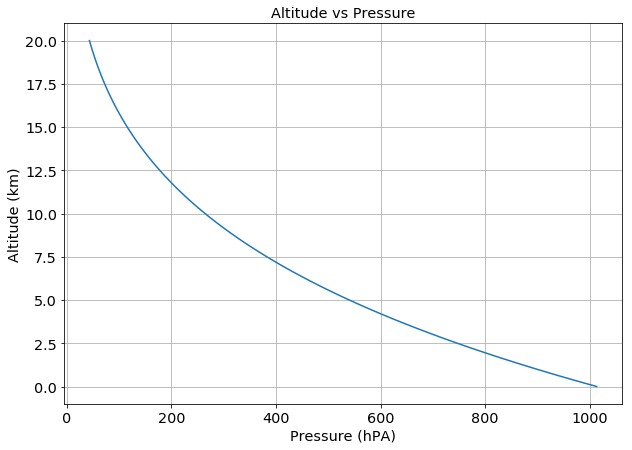

In [15]:
plt.plot(pres/100,alt)
plt.grid(True)
plt.title('Altitude vs Pressure')
plt.xlabel('Pressure (hPA)')
plt.ylabel('Altitude (km)')
plt.grid(True)